In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize

In [120]:
df=pd.read_csv('indian_liver_patient.csv')

# Create dummy or indicator features for categorical variables
df_dummies = pd.get_dummies(df, columns=['Gender'], drop_first=True)
#dropping target column
df_dummies = df_dummies.drop(columns=['Dataset'])

# Select numeric columns for scaling
numeric_cols = df_dummies.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numeric columns to scale them between 0 and 1
df_dummies[numeric_cols] = scaler.fit_transform(df_dummies[numeric_cols])

#  target variable is 'Dataset' and the rest are features
X = df_dummies 
y = df['Dataset'] 

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**The process starts by splitting the data into training and testing sets (80-20 split). A RandomForestClassifier is created with 100 trees and trained on the training data. The model predicts outcomes for the test set, and its performance is evaluated using metrics like accuracy, confusion matrix, recall, and precision. The confusion matrix is also visualized for better understanding.**

In [77]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(bootstrap=True, n_estimators=100, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

# Predict using the model
y_predict_rf = rf.predict(X_test)

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print("Confusion Matrix:")
print(cnf_matrix)

# Accuracy score
Accuracy_rf = accuracy_score(y_test, y_predict_rf)
print(f"Random Forest Accuracy: {Accuracy_rf:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predict_rf))


Confusion Matrix:
[[78  9]
 [20 10]]
Random Forest Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.90      0.84        87
           2       0.53      0.33      0.41        30

    accuracy                           0.75       117
   macro avg       0.66      0.61      0.63       117
weighted avg       0.73      0.75      0.73       117



<Axes: >

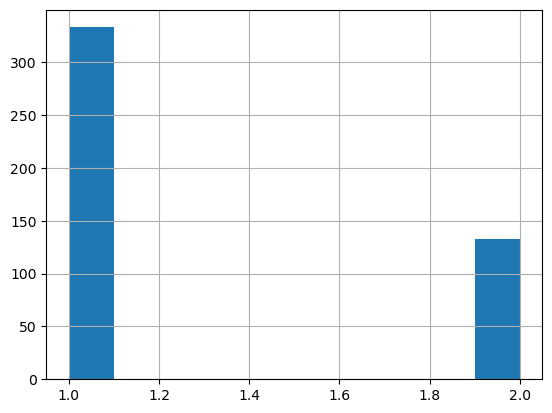

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
y_train.hist()

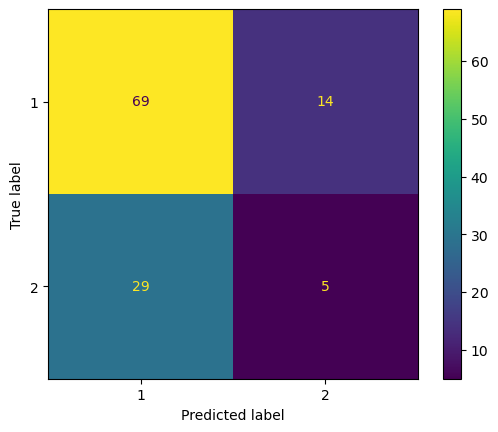

In [81]:
cm = confusion_matrix(y_test, y_predict_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.show()

In [83]:
recall_score(y_test, y_predict_rf)

0.8313253012048193

In [85]:
precision_score(y_test, y_predict_rf)

0.7040816326530612

**The model performs well for class 1, with high precision (0.80) and recall (0.90), but struggles with class 2, showing lower precision (0.53) and recall (0.33). This imbalance suggests the model is better at predicting the majority class. While the overall accuracy is 75%, improvements are needed to handle the minority class more effectively.**

In [154]:
data = data.rename(columns={'Gender_Male': 'Gender'})

In [158]:
data.columns = data.columns.str.strip()  # Strip any extra spaces

In [160]:
print(data.columns)

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender'],
      dtype='object')


**A logistic regression model is initialized and trained on the training data. Predictions are made using the trained model on the test set, and the model's performance is evaluated through accuracy, confusion matrix, classification report, and ROC-AUC score, with an optional ROC curve visualization to analyze the trade-off between true positive and false positive rates.**

In [192]:
# Drop rows with NaN values from both X and y
X_train, y_train = X_train.dropna(), y_train[X_train.dropna().index]
X_test, y_test = X_test.dropna(), y_test[X_test.dropna().index]

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Convert y_test and predictions to binary
y_test_binary = (y_test == 2).astype(int)
y_pred_prob_binary = log_reg.predict_proba(X_test)[:, 1]

# ROC-AUC Score and Curve
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.76

Confusion Matrix:
[[86  0]
 [28  1]]

Classification Report:
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        86
           2       1.00      0.03      0.07        29

    accuracy                           0.76       115
   macro avg       0.88      0.52      0.46       115
weighted avg       0.82      0.76      0.66       115

ROC-AUC Score: 0.76


In [172]:
# Print column names
print(data.columns)

#'Gender_Male', rename it to 'Gender'
data = data.rename(columns={'Gender_Male': 'Gender'})  # Adjust according to actual column name

# Handle missing values and encode 'Gender'
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender'],
      dtype='object')


In [194]:
# Train the model
lr_clf = LogisticRegression(penalty='l2', C=1, solver='saga')
lr_clf.fit(X_train, y_train)

# Make predictions
y_pred = lr_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7565217391304347


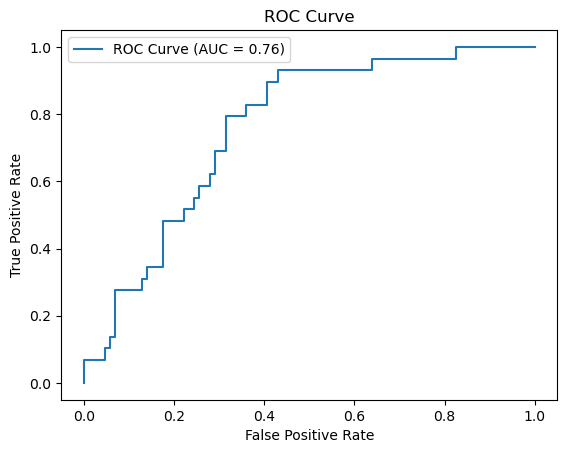

In [201]:
# Convert y_test and predictions to binary
y_test_binary = (y_test == 2).astype(int)
y_pred_prob_binary = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_prob_binary)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**A high accuracy and ROC-AUC score indicate good model fit, while the confusion matrix and classification report help identify areas for improvement, such as false positives or negatives. The ROC curve offers a visual representation of the trade-offs between the true positive rate and false positive rate.**

**Final Decision: While both models have very similar outcomes the logistic regression model is 0.01 more accurate than the random forest model.**